In [58]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score,confusion_matrix,classification_report


import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt



In [59]:
route=r"C:\Users\Cristian\Documents\Wave-Analitycs\dataset.xlsx"

dataset=pd.read_excel(route) #Importamos los datos y los limpios un poco para nuestro beneficio

dataset=dataset.drop(columns="segment")

dataset['magnitude']=dataset['magnitude'].round(2)

dataset



,person,frequency,magnitude,formant
0,0,360.200,1485318.68,171.4079
1,0,223.200,1552067.93,172.1126
2,0,101.600,1557121.17,171.2797
3,0,412.000,1522081.22,169.9416
4,0,410.000,1762164.55,170.2831
...,...,...,...,...
130,2,175.400,172705.00,167.5362
131,2,412.800,119705.05,171.3715
132,2,489.800,351187.29,168.3901
133,2,520.800,195116.44,168.6442


In [60]:
x = dataset.drop('person', axis=1).values

y = dataset.drop(columns=['frequency','magnitude','formant'],axis=1).iloc[:135].values.ravel()

print(x.shape,y.shape)

(135, 3) (135,)


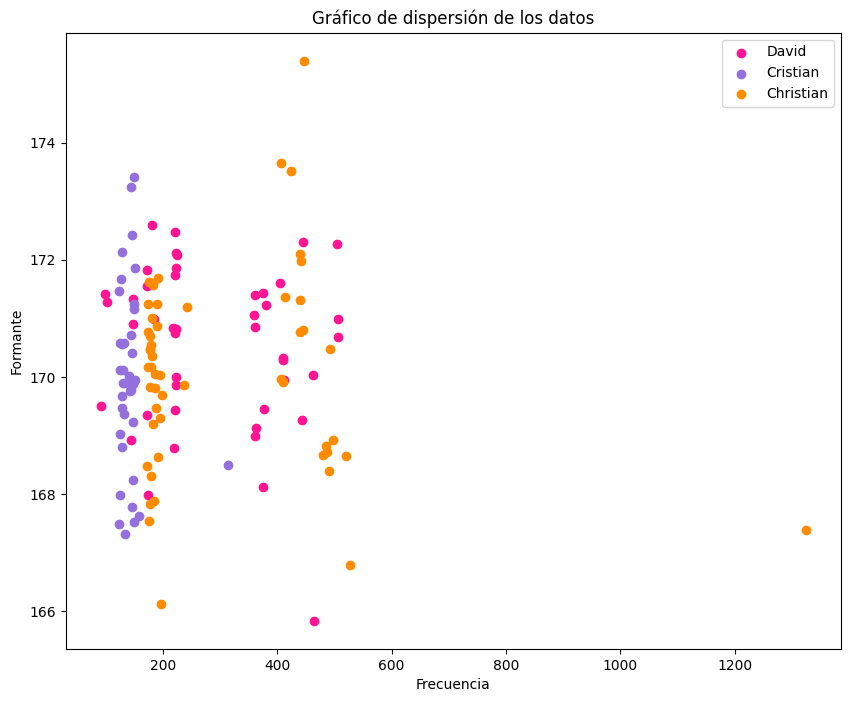

In [61]:
plt.figure(figsize=(10, 8))

colors: list= ["deeppink","mediumpurple","darkorange"]


for i in range(3):
    plt.scatter(x[y == i, 0], x[y == i, 2], label=["David","Cristian","Christian"][i],color=colors[i])

plt.title('Gráfico de dispersión de los datos')

plt.xlabel('Frecuencia')
plt.ylabel('Formante')

plt.legend()

plt.show()

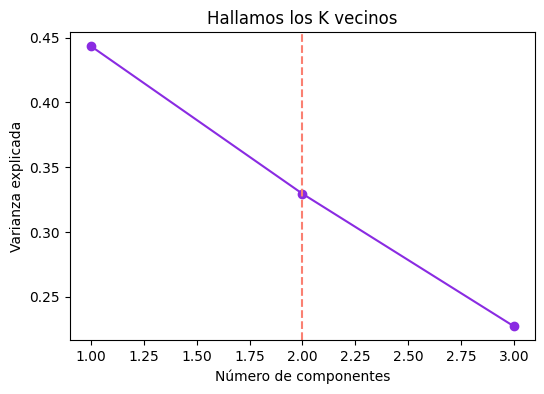

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Hallamos la k


scaler = StandardScaler() # Normalizamos de los datos

X_scaled = scaler.fit_transform(x) #Normalizamos los x pues son los datos numericos del dataset, en este caso las y no nos sirven

pca = PCA() # análisis de componentes principales
X_pca = pca.fit_transform(X_scaled)

# Calculamos la varianza explicada acumulada
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(6, 4)) 
plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1 ), pca.explained_variance_ratio_, 'o-',color="blueviolet") #El mas 1 en el range() es para equlibrar el tamaño
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada')
plt.title("Hallamos los K vecinos")

plt.axvline(x=2, color='salmon', linestyle='--')

plt.show()

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=70)